In [3]:
import pandas as pd

# Load data from a text file

path = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv"
df_students = pd.read_csv(path,delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

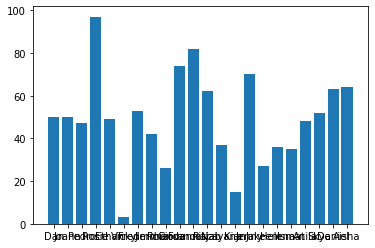

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(x=df_students.Name, height=df_students.Grade);

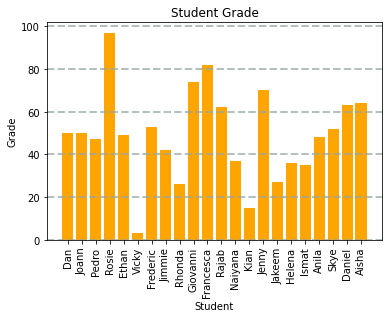

In [6]:
# imporve the plot

plt.bar(x=df_students.Name, height=df_students.Grade, color="orange")

plt.title("Student Grade")
plt.xlabel("Student")
plt.ylabel("Grade")
plt.grid(color="#95a5a6", linestyle="--", linewidth=2, axis="y", alpha=0.7)
plt.xticks(rotation=90);

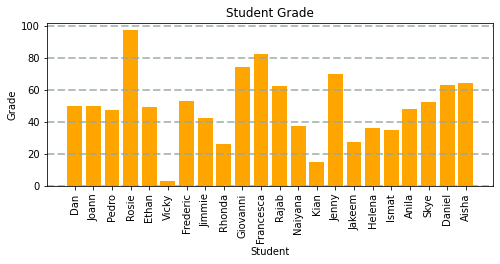

In [8]:
fig = plt.figure(figsize=(8, 3))

plt.bar(x=df_students.Name, height=df_students.Grade, color="orange")

plt.title("Student Grade")
plt.xlabel("Student")
plt.ylabel("Grade")
plt.grid(color="#95a5a6", linestyle="--", linewidth=2, axis="y", alpha=0.7)
plt.xticks(rotation=90);

## Subplot

C:\Users\USER\AppData\Local\Temp\ipykernel_18440\3488228762.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name, rotation=90)


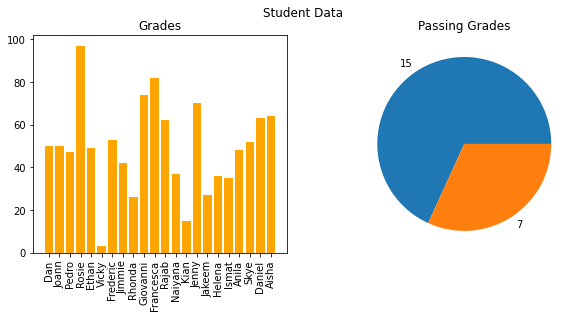

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].bar(x=df_students.Name, height=df_students.Grade, color="orange")
ax[0].set_title("Grades")
ax[0].set_xticklabels(df_students.Name, rotation=90)

pass_counts= df_students["Pass"].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title("Passing Grades")

fig.suptitle("Student Data");

<AxesSubplot:xlabel='Name'>

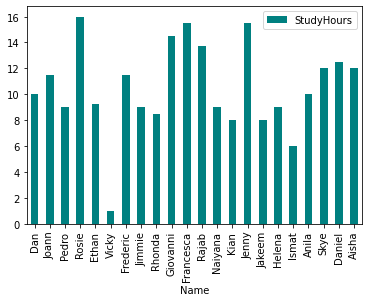

In [13]:
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))

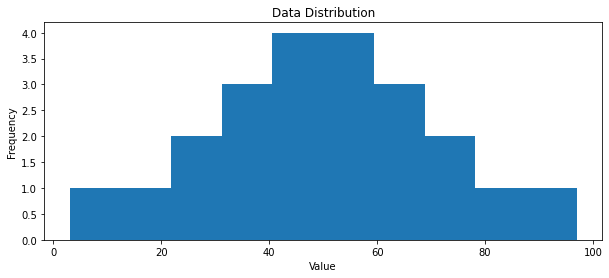

In [15]:
# Get the variable to examine
var_data = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency');

## Measures of Central Tendency
- The mean: A simple average based on adding together all of the values in the sample set, and then dividing the total by the number of samples.
- The median: The value in the middle of the range of all of the sample values.
- The mode: The most commonly occuring value in the sample set*.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



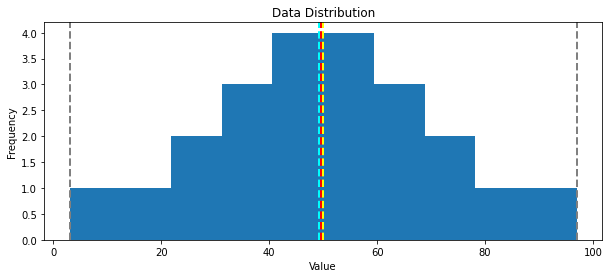

In [16]:
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency');

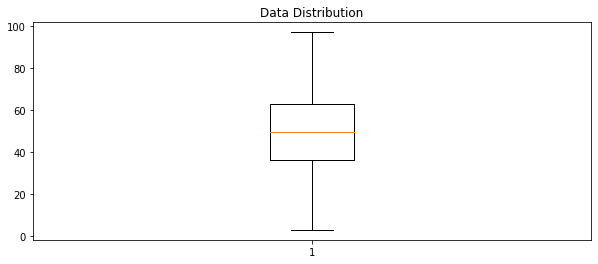

In [18]:
# Get the variable to examine
var = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution');

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



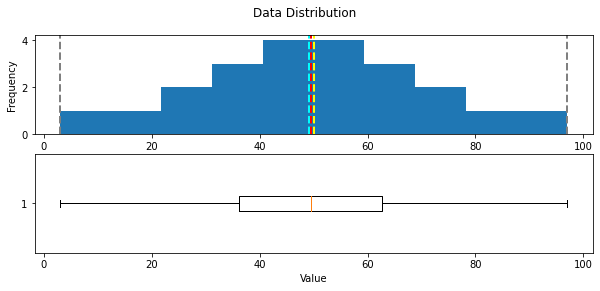

In [20]:
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

        # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution');

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)

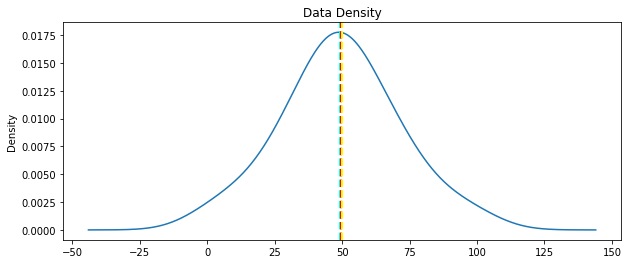

In [21]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = df_students['Grade']
show_density(col)